In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import imageio
from fd_functions import *

In [2]:
Nx = 100
start = 0.
end = 1.
x = np.linspace(start,end,Nx,endpoint = False)
dx = (end-start)/Nx
a1 = 1.
a2 = -1.
CF = 2.**(-3)
dt = CF*dx
t = 0.
print(dx)

0.01


In [3]:
def u_ana(x,t,sigma,x0):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-t-x0)**2/(2*sigma**2))
def v_ana(x,t):
    return 0*x

In [4]:
t = 0 
t_target = 3.0
sigma = 0.05
x0 = 0.5
u = u_ana(x, t, sigma, x0)
v = v_ana(x,0)
#plt.plot(x,u)
nt = int((t_target-t)/dt)
print (nt)

2400


In [5]:
direc = "results_1"
if os.path.isdir(direc):
    print('Directory'+direc+'already exists')
else:
    os.makedirs(direc)
images = []

In [6]:
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    u = RK4_step(u, a1, dx,dt,du_dx_radiative,d_dt, vn)
    v = RK4_step(v, a2, dx,dt,du_dx_radiative,d_dt, None)
    v[0] = a1*(du_dx_radiative(u,a1,dx)[0])
    v[-1]= a1*(du_dx_radiative(u,a1,dx)[-1])
    t += dt
    if n%24 ==0:
        plt.figure(figsize=(11, 7), dpi=100)
        plt.plot(x,u, label = 'u')
        plt.plot(x,v, linestyle = '--', label = 'v')
        plt.ylim(-10,10)
        plt.title(str(np.round(t,3)))
        plt.legend()
        name = direc+"/figure"+str(np.round(t,3))+'.png'
        plt.savefig(name)
        images.append(imageio.imread(name))
        plt.close()
gifName = direc+'/movie.gif'
imageio.mimsave(gifName,images)

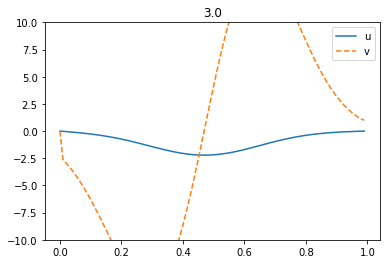

In [7]:
plt.plot(x,u, label = 'u')
plt.plot(x,v, linestyle = '--', label = 'v')
plt.ylim(-10,10)
plt.title(str(np.round(t,3)))
plt.legend()